# Название проекта: Анализ А/В-теста  и проверка гипотезы по увеличению выручки крупного интернет-магазина

У нас есть данные по заказам и количеству пользователей за каждый день августа 2019 года, полученные по результатам проведенного А/В-теста. В дополнение у нас имеются данные о 9 гипотезах по увеличению выручки интернет-магазина.

Цель проекта: принять решение по результатам проведенного А/В-теста — остановить тест (и оценить результаты) или продолжить.

Для выполнения данной цели нам поставили следующие задачи: 1. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло. 2. Построить графики кумулятивной выручки и среднего чека по группам, относительного изменения кумулятивного среднего чека и среднего количества заказов группы B к группе A, кумулятивного среднего количества заказов на посетителя по группам, точечный график количества заказов и стоимости заказов по пользователям. 3. Посчитать 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов. 4. Выбрать границу для определения аномальных пользователей и отфильтровать данные. 5. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами по «сырым» и отфильтрованным данным. 5. Принять решение по результатам теста — остановить тест (и оценить результаты) или продолжить тест.

Описание данных: у нас есть три файла с данными — один хранит описание 9-ти гипотез (с параметрами reach, impact, confidence, effort); второй — информацию о заказах в интернет-магазине за август 2019 года; третий — информацию о количестве пользователей в указанную дату в указанной группе.

Краткий план работы:

Чтобы выполнить поставленные задачи и придти к намеченной цели, нам предварительно надо: 1. Открыть файлы и провести первичный просмотр данных. 2. Провести предобработку данных (проанализировать пропуски, дубликаты (явные и неявные), проверить формат данных, проверить ошибки в данных, проанализировать аномальные данные и решить, удалять их или нет). 3. Провести исследовательский анализ данных — проанализировать данные по дате, выручке, группе, количеству пользователей, посмотреть распределение данных (min, max, медиану, среднюю, квартили и т.д.), а также проанализировать связь некоторых данных между собой. 4. Построить и провести анализ графиков. 5. Отфильтровать аномальные данные. 6. Провести статистический анализ. 6. Сделать выводы.

In [259]:
#импортируем библиотеки которые нам понадобятся
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Часть 1. Приоритизация гипотез.

In [260]:
#загружаем данные о 9 гипотезах по увеличению выручки интернет-магазина в переменную hypothesis
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 200
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [261]:
#Применим фреймворк ICE для приоритизации гипотиз. Отсортируем их по убыванию приоритета.
hypothesis['ice_score'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ice_score']].sort_values(by = 'ice_score', ascending=False))

,Hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [262]:
#Применим фреймворк RICE для приоритизации гипотиз. Отсортируем их по убыванию приоритета.
hypothesis['rice_score'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).sort_values(ascending=False)
display(hypothesis[['Hypothesis', 'rice_score']].sort_values(by = 'rice_score', ascending=False))

,Hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Сокращения в выводах:</b> 

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - "Добавить два новых канала..."

Запустить собственную службу доставки, что сократит срок доставки заказов - "Запустить собственную службу доставки..."

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - "Добавить блоки рекомендаций..."

Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар	- "Изменить структура категорий..."

Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей - "Изменить цвет фона..."

Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов - "Добавить страницу отзывов..."

Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - "Показать на главной странице..."

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - "Добавить форму подписки..."

Запустить акцию, дающую скидку на товар в день рождения - "Запустить акцию..."



### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE.
Приоритизация гипотез изменилась при применении RICE вместо ICE. Четыре хвостовых гипотезы ("Запустить собственную службу доставки....", "Изменить структура категорий...", "Изменить цвет фона...", "Добавить страницу отзывов ...") при использовании ICE так же остались в хвосте и при использовании RICE (но немного поменяли порядок).
А вот в тройке лидеров при использовании ICE ("Запустить акцию..., "Добавить два новых канала..."	, "Добавить форму подписки...") поменялся один элемент при использовании RICE ("Добавить форму подписки...", "Добавить блоки рекомендаций...", "Добавить два новых канала..."), еще и изменился порядок. Гипотеза "Запустить акцию..." была первой по ICE, но при использовании RICE она ушла из тройки лидеров и заняла срединное место (пятое). На первое место вышла гипотеза "Добавить форму подписки..." (она была в тройке лидеров при использовании ICE). Но при использовании RICE она получила большое приемущество, ее коэффициент стал в два раза больше второй по порядку гипотезы (112 и 56 соответственно). При использовании ICE разница между гиротезами на 1 месте и на 2 месте была незначительная.



### Объясните, почему так произошло.
Четыре гипотезы с низкими и ICE, и RICE имеют либо высокий efforts (стоимость тестирования этих гипотез), либо низкие impact (влияние на пользователей) и confidence (наша уверенность во влиянии impact на пользователей). Причем в данной картине не так важен reach, например, у гипотезы "Изменить структура категорий..." он высокий, но все равно она остается в хвосте при использовании обоих коэффициентов.

Гипотеза "Добавить форму подписки..." вышла на первое место потому, что у нее по сравнению с гипотезой "Запустить акцию..." большой охват (reach).




# Часть 2. Анализ А/В-теста.

In [263]:
#загружаем данные о результатах А/В-теста в переменные visitors и orders
orders, visitors = (pd.read_csv('/datasets/orders.csv'),
                    pd.read_csv('/datasets/visitors.csv'))
                         
display(orders.head(5))
visitors.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [264]:
#проводим предобработку данных - проверяем есть ли пропусками
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропуски в данных отсутствуют

In [265]:
#проверяем наличие явных дубликатов
display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

Явных дубликатов нет...

In [266]:
#проверяем наличие неявных дубликатов
display(visitors['group'].unique())
display(orders['group'].unique())

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
display(orders.groupby('visitorId').count())
display(orders.groupby('transactionId').count())

array(['A', 'B'], dtype=object)

array(['B', 'A'], dtype=object)

,transactionId,date,revenue,group
visitorId,,,,
5114589,1,1,1,1
6958315,1,1,1,1
8300375,2,2,2,2
11685486,1,1,1,1
39475350,1,1,1,1
...,...,...,...,...
4266935830,2,2,2,2
4278982564,1,1,1,1
4279090005,1,1,1,1


,visitorId,date,revenue,group
transactionId,,,,
1062393,1,1,1,1
4919758,1,1,1,1
7210578,1,1,1,1
8131427,1,1,1,1
11068804,1,1,1,1
...,...,...,...,...
4276811111,1,1,1,1
4279408906,1,1,1,1
4281129020,1,1,1,1


Имеем две группы (А и В) в обоих файлах. Есть пользователи совершившие несколько заказов - до 11. Идентификаторы заказов не повторяются.

In [267]:
# проверяем разбросс дат
display(pd.DatetimeIndex(orders['date']).year.unique())
display(pd.DatetimeIndex(visitors['date']).year.unique())

display(pd.DatetimeIndex(orders['date']).month.unique())
display(pd.DatetimeIndex(visitors['date']).month.unique())

Int64Index([2019], dtype='int64', name='date')

Int64Index([2019], dtype='int64', name='date')

Int64Index([8], dtype='int64', name='date')

Int64Index([8], dtype='int64', name='date')

Данные в обоих файлах за август 2019 год. 

In [268]:
#смотрим разброс данных по выручке
display(orders['revenue'].describe())
display(np.percentile(orders['revenue'], [1, 50, 95, 99]))
#orders['revenue'].hist(bins=200);
#orders['revenue'].hist(bins=100, range=(0, 3000));
#orders['revenue'].hist(bins=100, range=(3000, 100000))
#orders['revenue'].hist(bins=100, range=(100000, 1500000))
#orders1 = orders[orders['revenue'] <= 100000]

#orders1['revenue'].hist(bins=200)
#display(orders1['revenue'].describe())


count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

array([  100. ,  2978. , 28000. , 58233.2])

Всего 2 заказа больше 100000, один около 200000, другой около 1200000. Всего 5% заказов больше 30000 и 1% заказов больше 60000 и меньше 100. Пока мы оставили все заказы - но запомнили, картину распределения данных по заказам...

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

array([365.88, 624.5 , 747.9 , 769.39])

<AxesSubplot:>

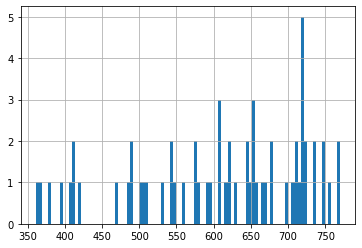

In [269]:
#смотрим разброс данных по количеству пользователей
display(visitors['visitors'].describe())
display(np.percentile(visitors['visitors'], [1, 50, 95, 99]))
visitors['visitors'].hist(bins=100)

Количество пользователей довольно равномерно распределено по дням от 360 до 770 человек. Бросается в глаза провал - нет дней когда было от 420 до 460 человек.

Предобработка данных закончена. Далее проведем небольшой исследовательский анализ.

,revenue
date,
2019-08-01,249796
2019-08-02,259353
2019-08-03,226721
2019-08-04,179396
2019-08-05,216646
2019-08-06,290826
2019-08-07,367751
2019-08-08,317197
2019-08-09,349318


Text(0, 0.5, 'выручка')

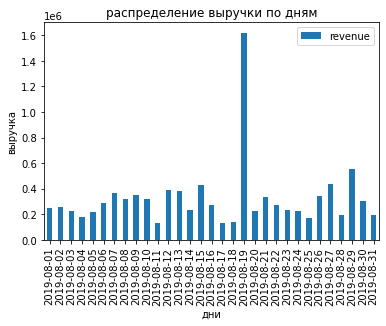

In [270]:
#посмотрим как сумма выручки распределена по датам покупок
display(orders.pivot_table(index='date', values='revenue', aggfunc='sum'))
orders.pivot_table(index='date', values='revenue', aggfunc='sum').plot.bar(); 
plt.title('распределение выручки по дням')
plt.xlabel('дни')
plt.ylabel('выручка')

Распределение довольно равномерное по всем датам, а 19 августа видимо был совершен большой заказ.

,visitorId
date,
2019-08-01,45
2019-08-02,44
2019-08-03,40
2019-08-04,33
2019-08-05,48
2019-08-06,46
2019-08-07,42
2019-08-08,43
2019-08-09,41


Text(0, 0.5, 'к-во покупок')

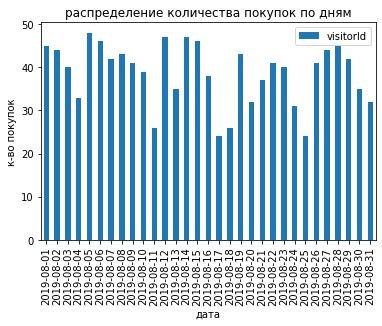

In [271]:
#посмотрим как количество покупок распределено по датам
display(orders.pivot_table(index='date', values='visitorId', aggfunc='count'))
orders.pivot_table(index='date', values='visitorId', aggfunc='count').plot.bar(); 
plt.title('распределение количества покупок по дням')
plt.xlabel('дата')
plt.ylabel('к-во покупок')

Распределение покупок тоже довольно равномерное по всем датам, в целом в те дни когда сумма выручки низкая, то и к-во покупок низкое (11.08, 17-18.08, 25.08).

group,A,B
date,,
2019-08-01,148579,101217
2019-08-02,93822,165531
2019-08-03,112473,114248
2019-08-04,70825,108571
2019-08-05,124218,92428
2019-08-06,48484,242342
2019-08-07,142417,225334
2019-08-08,96279,220918
2019-08-09,188506,160812


group,A,B
date,,
2019-08-01,6190.791667,4819.857143
2019-08-02,4691.100000,6897.125000
2019-08-03,4686.375000,7140.500000
2019-08-04,4426.562500,6386.529412
2019-08-05,4968.720000,4018.608696
2019-08-06,2693.555556,8655.071429
2019-08-07,7912.055556,9388.916667
2019-08-08,6017.437500,8182.148148
2019-08-09,11781.625000,6432.480000


group,A,B
date,,
2019-08-01,24,21
2019-08-02,20,24
2019-08-03,24,16
2019-08-04,16,17
2019-08-05,25,23
2019-08-06,18,28
2019-08-07,18,24
2019-08-08,16,27
2019-08-09,16,25


Text(0, 0.5, 'к-во покупок')

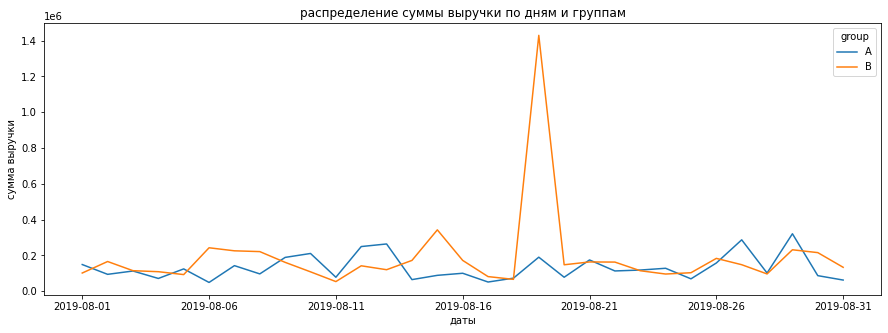

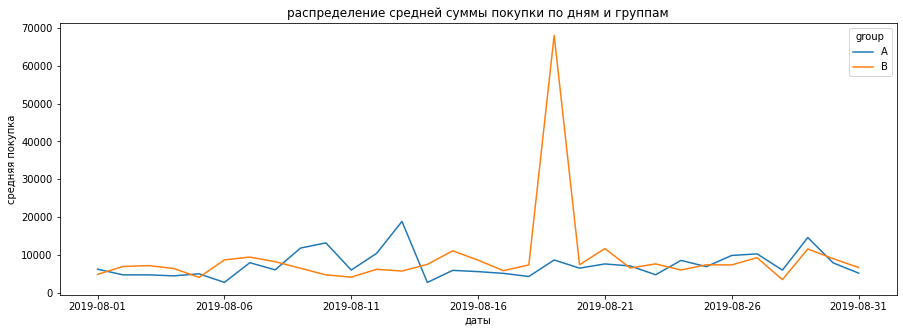

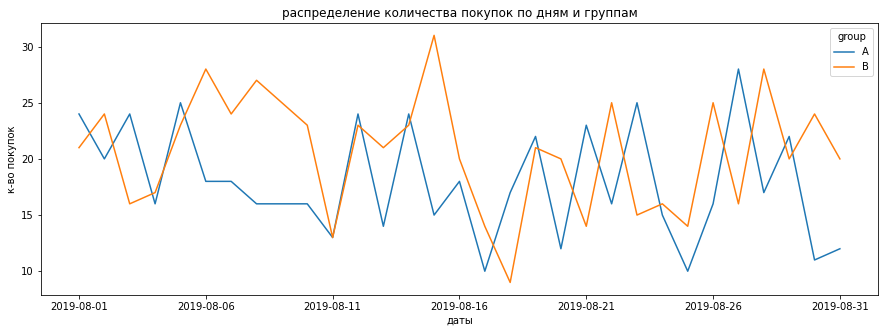

In [272]:
#посмотрим как сумма выручки и средняя покупка распределены по датам и группам
display(orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum'))
display(orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='mean'))
display(orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='count'))

#построим графики
orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='sum').plot(figsize=(15,5)); 
plt.title('распределение суммы выручки по дням и группам')
plt.xlabel('даты')
plt.ylabel('сумма выручки')

orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='mean').plot(figsize=(15,5)); 
plt.title('распределение средней суммы покупки по дням и группам')
plt.xlabel('даты')
plt.ylabel('средняя покупка')

orders.pivot_table(index='date', columns='group', values='revenue', aggfunc='count').plot(figsize=(15,5)); 
plt.title('распределение количества покупок по дням и группам')
plt.xlabel('даты')
plt.ylabel('к-во покупок')

Распределение суммы выручки, средней стоимости покупки и к-ва покупок распределено довольно равномерно в обоих группах по всем дням (за исключением миллионной покупки). Миллионная покупка была совершена в группе В. Также наблюдаются периоды, когда количество покупок в группе В превышает группу А.

In [273]:
#смотрим в целом по группам
display('Количество покупок в группе А:', orders[orders['group'] == 'A']['revenue'].count())
display('Количество покупок в группе В:', orders[orders['group'] == 'B']['revenue'].count())

display('Общая сумма выручки в группе А:', orders[orders['group'] == 'A']['revenue'].sum())
display('Общая сумма выручки в группе В:', orders[orders['group'] == 'B']['revenue'].sum())

display('Средняя стоимость одной покупки в группе А:', orders[orders['group'] == 'A']['revenue'].mean())
display('Средняя стоимость одной покупки в группе В:', orders[orders['group'] == 'B']['revenue'].mean())

display('Медианная стоимость одной покупки в группе А:', orders[orders['group'] == 'A']['revenue'].median())
display('Медианная стоимость одной покупки в группе В:', orders[orders['group'] == 'B']['revenue'].median())

'Количество покупок в группе А:'

557

'Количество покупок в группе В:'

640

'Общая сумма выручки в группе А:'

4084803

'Общая сумма выручки в группе В:'

5907760

'Средняя стоимость одной покупки в группе А:'

7333.578096947936

'Средняя стоимость одной покупки в группе В:'

9230.875

'Медианная стоимость одной покупки в группе А:'

3000.0

'Медианная стоимость одной покупки в группе В:'

2965.0

Средняя и медианная стоимость заказов в группе А и В примерно схожа (около 7000–9000 и около 3000 соответственно). В группе В на 80 заказов больше, чем в группе А, — это около 12–14% от общего к-ва для каждой группы. Также в группе B на 1800000 сумма заказов больше, чем в группе А (а без учета двух больших заказов — всего на 300000 больше).

group,A,B
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707
2019-08-06,667,655
2019-08-07,644,709
2019-08-08,610,654
2019-08-09,617,610


group,A,B
date,,
2019-08-01,719,713
2019-08-02,619,581
2019-08-03,507,509
2019-08-04,717,770
2019-08-05,756,707
2019-08-06,667,655
2019-08-07,644,709
2019-08-08,610,654
2019-08-09,617,610


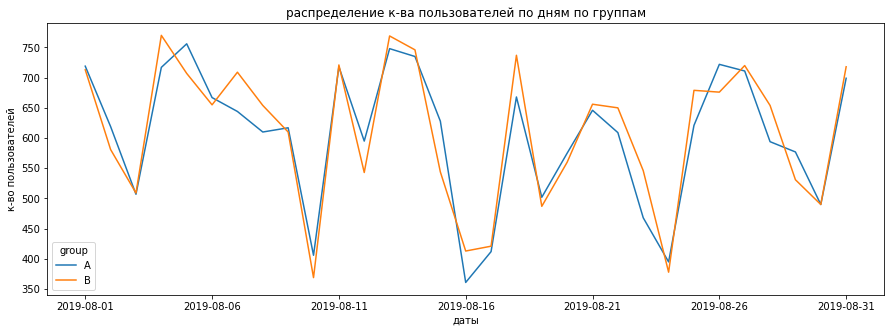

In [274]:
#посмотрим как количество пользователей распределена по датам по группам
display(visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean'))

raspr_day_group = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean')
raspr_day_group.plot(figsize=(15,5)); 
plt.title('распределение к-ва пользователей по дням по группам')
plt.xlabel('даты')
plt.ylabel('к-во пользователей')
raspr_day_group

Количество пользователей синхронно распределено по группам. Но не равномерно по дням месяца. Бросается в глаза то, что данные о количестве пользователей в датасете visitors смещены на один день назад по сравнению с данными о количестве покупок и сумме выручки в датасете orders. Дни, когда было совершено мало покупок и была небольшая сумма выручки (11.08, 17–18.08, 25.08 — в датасете orders), не совпадают с днями, когда интернет-магазин посетило мало пользователей (10.08, 16–17.08, 24.08). По идее, эти данные должны быть синхронны, но мы наблюдаем смещение дат в файлах. Видимо, это ошибка.

In [275]:
#смотрим в целом по группам
display('Среднее количество пользователей в группе А:', visitors[visitors['group'] == 'A']['visitors'].mean())
display('Среднее количество пользователей в группе В:', visitors[visitors['group'] == 'B']['visitors'].mean())

display('Медианное количество пользователей в группе А:', visitors[visitors['group'] == 'A']['visitors'].median())
display('Медианное количество пользователей в группе В:', visitors[visitors['group'] == 'B']['visitors'].median())

display('Общее количество пользователей в группе А:', visitors[visitors['group'] == 'A']['visitors'].sum())
display('Общее количество пользователей в группе В:', visitors[visitors['group'] == 'B']['visitors'].sum())

display('Количество дней в группе А:', visitors[visitors['group'] == 'A']['visitors'].count())
display('Количество дней в группе А:', visitors[visitors['group'] == 'B']['visitors'].count())

'Среднее количество пользователей в группе А:'

604.3870967741935

'Среднее количество пользователей в группе В:'

610.1935483870968

'Медианное количество пользователей в группе А:'

619.0

'Медианное количество пользователей в группе В:'

654.0

'Общее количество пользователей в группе А:'

18736

'Общее количество пользователей в группе В:'

18916

'Количество дней в группе А:'

31

'Количество дней в группе А:'

31

Среднее, медианное и общее количество пользователей примерно одинаковое по группам.

Первичный анализ данных закончен - приступаем к расчетам второй части проекта

Text(0, 0.5, 'кумулятивная выручка')

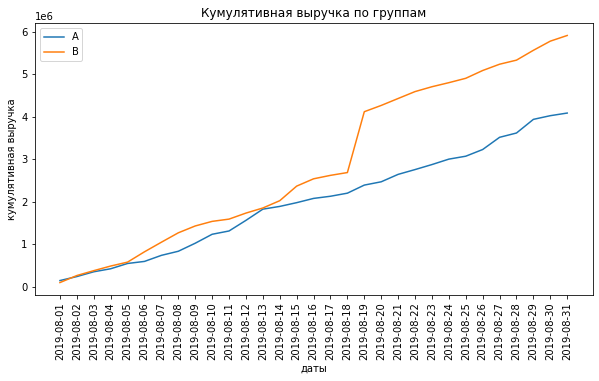

In [276]:
#Построим график кумулятивной выручки по группам.

#создадим массив уникальных пар значений дат и групп теста
datesGroup = orders[['date', 'group']].drop_duplicates()

#соберем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroup.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                   .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)\
                                   .sort_values(by=['date', 'group'])

#получим агрегированные купулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroup.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                   .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                   .sort_values(by=['date', 'group'])

#Объединяем обе таблицы в одну с понятным названием столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#Построим график кумулятивной выручки по дням и группам
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
plt.figure(figsize=(10,5))
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

#строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.ylabel('кумулятивная выручка')

При анализе кумулятивной выручки по всему массиву данных 18 августа виден скачок кумулятивной выручки в группе В — видимо, это влияние крупного заказа.

Text(0, 0.5, 'кумулятивная выручка')

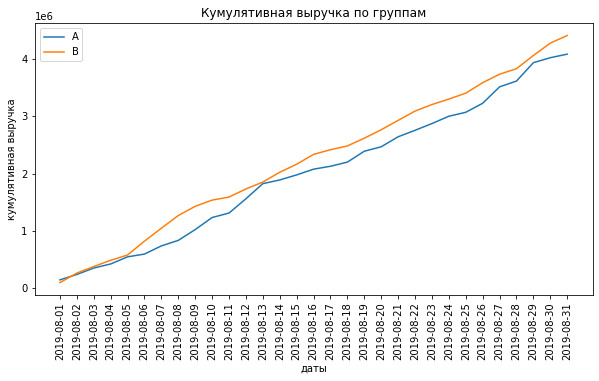

In [277]:
#Построим график кумулятивной выручки по группам без учета двух крупных заказов 
orders1 = orders[orders['revenue'] <= 199900]
#создадим массив уникальных пар значений дат и групп теста

datesGroup1 = orders1[['date', 'group']].drop_duplicates()

#соберем агрегированные кумулятивные по дням данные о заказах
ordersAggregated1 = datesGroup1.apply(lambda x: orders1[np.logical_and(orders1['date'] <= x['date'], orders1['group'] == x['group'])]\
                                   .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)\
                                   .sort_values(by=['date', 'group'])

#получим агрегированные купулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated1 = datesGroup.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                   .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                   .sort_values(by=['date', 'group'])

#Объединяем обе таблицы в одну с понятным названием столбцов
cumulativeData1 = ordersAggregated1.merge(visitorsAggregated1, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData1.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#Построим график кумулятивной выручки по дням и группам
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA1 = cumulativeData1[cumulativeData1['group'] == 'A'][['date', 'revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulativeRevenueB1 = cumulativeData1[cumulativeData1['group'] == 'B'][['date', 'revenue', 'orders']]

#строим график выручки группы А
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA1['date'], cumulativeRevenueA1['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulativeRevenueB1['date'], cumulativeRevenueB1['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.ylabel('кумулятивная выручка')

Выводы и предположения.

После удаления из данных двух крупных заказов (200000 и 1200000), видно, выручка почти равномерно увеличивается в обоих группах в течение всего теста. В группе В стабильно выше, чем в группе А.

Text(0, 0.5, 'кумулятивный средний чек')

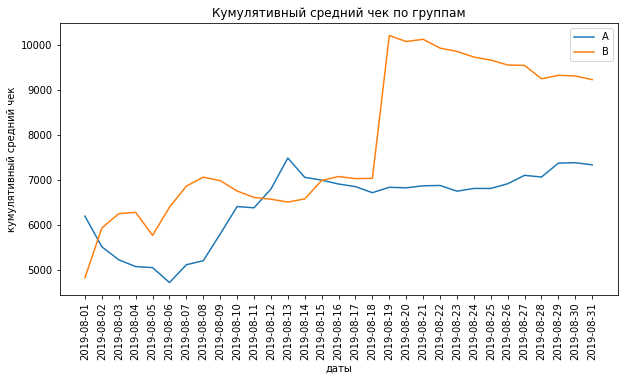

In [278]:
#Построим график кумулятивного среднего чека по группам. 
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.ylabel('кумулятивный средний чек')

Выводы и предположения.

При рассмотрении всего массива данных средний чек не стал равномерным по обоим группам. В группе В виден скачок среднего чека (за счет дорогого заказа), а затем постепенное снижение. В группе А средний чек продолжает расти.

Text(0, 0.5, 'кумулятивный средний чек')

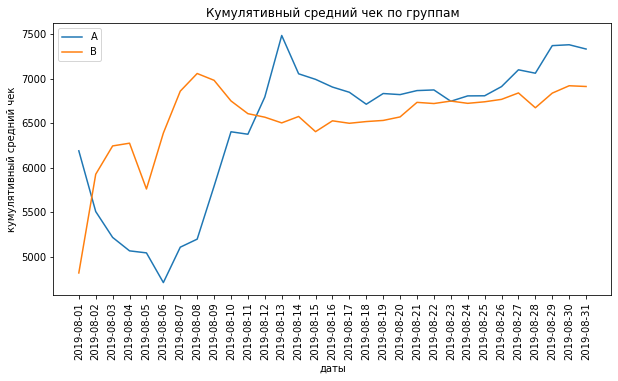

In [279]:
#Построим график кумулятивного среднего чека по группам без учета двух больших заказов. 
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA1['date'], cumulativeRevenueA1['revenue']/cumulativeRevenueA1['orders'], label = 'A')
plt.plot(cumulativeRevenueB1['date'], cumulativeRevenueB1['revenue']/cumulativeRevenueB1['orders'], label = 'B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.ylabel('кумулятивный средний чек')

Выводы и предположения.

После удаления из данных двух крупных заказов (200000 и 1200000), видно, что кумулятивный средний чек не стал равномерным по обоим группам. В группе А растет более резко, в группе В менее резко, но тоже растет... Возможно в группу В в первой половине теста еще попали крупные заказы


Text(0.5, 0, 'даты')

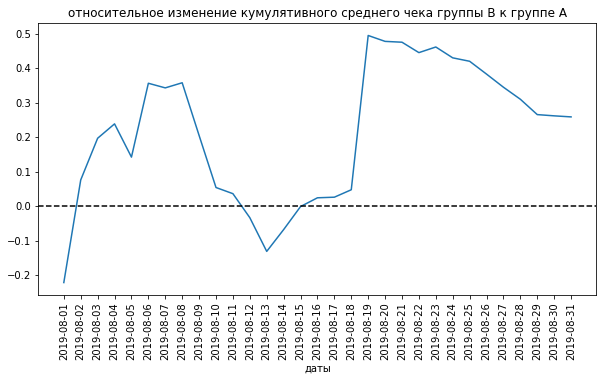

In [280]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

#соберем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим отношения средних чеков
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#добавляем ось Х
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.xlabel('даты')


Выводы и предположения. 

При рассмотрении всего массива данных видно, что в нескольких точках график различий между сегментами резко «скачет». Видимо, это эффект крупного заказа в группе В.

Text(0.5, 0, 'даты')

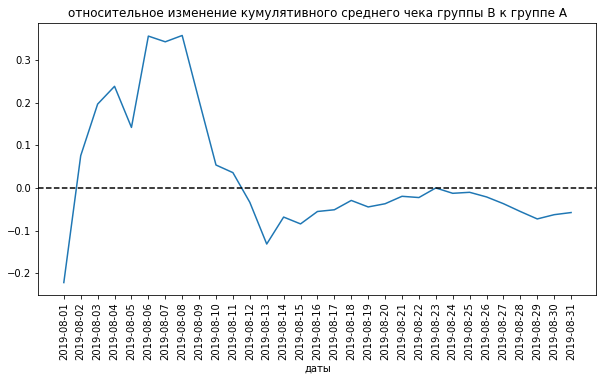

In [281]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A. (без двух дорогих)

#соберем данные в одном датафрейме
mergedCumulativeRevenue1 = cumulativeRevenueA1.merge(cumulativeRevenueB1, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим отношения средних чеков
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue1['date'],(mergedCumulativeRevenue1['revenueB']/mergedCumulativeRevenue1['ordersB'])/(mergedCumulativeRevenue1['revenueA']/mergedCumulativeRevenue1['ordersA'])-1)

#добавляем ось Х
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.xlabel('даты')

Выводы и предположения. 

При удалении двух больших заказов график изменился. Похоже, что в первой половине теста были крупные заказы в группах...
Но до сих пор значение средних чеков не стабилизировалось...

(0.0, 30.0, 0.0, 0.04)

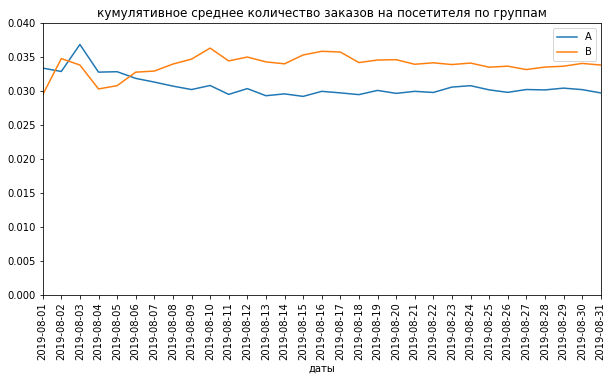

In [282]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам. 

#считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделяем данные по группе А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

#отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

#строим график
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('кумулятивное среднее количество заказов на посетителя по группам')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.axis(['2019-08-01', '2019-08-31', 0, 0.04])

Выводы и предположения. 

При рассмотрении всего массива данных, симметричный график не получился: у группы В среднее количество заказов стабильно выше, а у группы А — стабильно ниже. Видно, что у обоих групп кумулятивное среднее количество заказов зафиксировалось.

(0.0, 30.0, 0.0, 0.04)

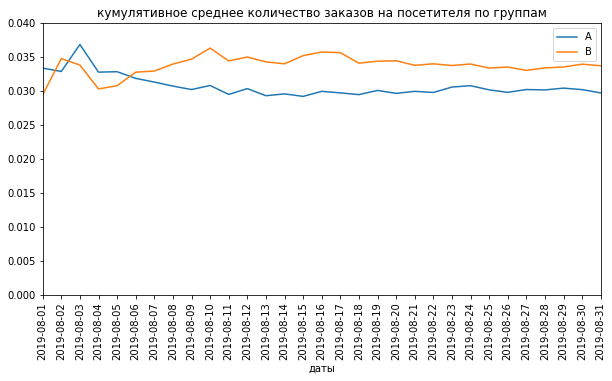

In [283]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам (без двух кркпных заказов). 

#считаем среднее количество заказов на посетителя
cumulativeData1['conversion'] = cumulativeData1['orders']/cumulativeData1['visitors']

#отделяем данные по группе А
cumulativeDataA1 = cumulativeData1[cumulativeData1['group'] == 'A']

#отделяем данные по группе B
cumulativeDataB1 = cumulativeData1[cumulativeData1['group'] == 'B']

#строим график
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA1['date'], cumulativeDataA1['conversion'], label='A')
plt.plot(cumulativeDataB1['date'], cumulativeDataB1['conversion'], label='B')


plt.legend()
plt.title('кумулятивное среднее количество заказов на посетителя по группам')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.axis(['2019-08-01', '2019-08-31', 0, 0.040])

При удалении из данных двух больших заказов - результаты не изменились - кумулятивное среднее количество заказов на посетителя группы В стабильно и ровно больше, чем в группе А

Text(0.5, 0, 'даты')

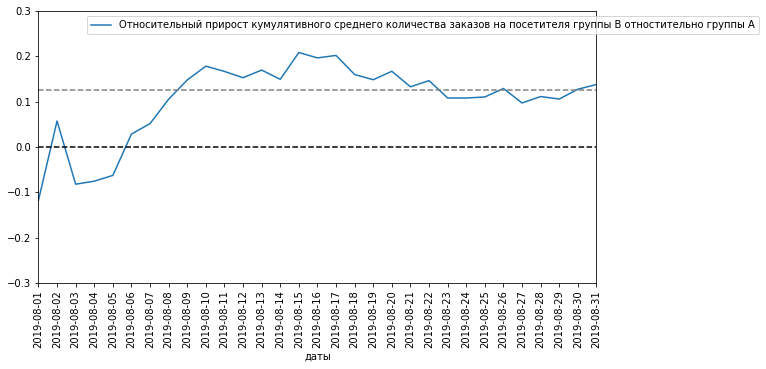

In [284]:
#Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
mergedCumulativeConversion = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversion['date'], mergedCumulativeConversion['conversionB']/mergedCumulativeConversion['conversionA']-1, label ='Относительный прирост кумулятивного среднего количества заказов на посетителя группы В отностительно группы А')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.axhline(y=0.125, color='grey', linestyle = '--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3])
plt.xticks(rotation=90)
plt.xlabel('даты')

Выводы и предположения. 

При рассмотрении всего массива данных видно, что вначале теста группа В выигрывала у группы А, затем случился провал, но после 3 августа начался рост кумулятивного среднего количества заказов и после 17 августа снова снизился. В целом отношение среднего количества заказов на посетителя уже установились. Количество заказов в группе В стабильно больше, чем в группе А.

Text(0.5, 0, 'даты')

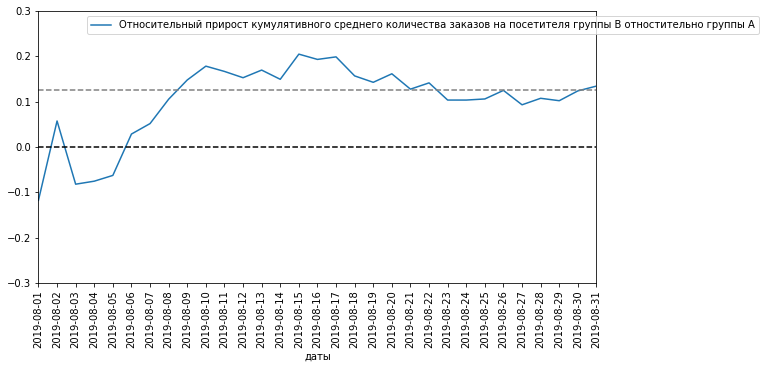

In [285]:
#Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A (без учета двух дорогих заказов). 
mergedCumulativeConversion1 = cumulativeDataA1[['date', 'conversion']].merge(cumulativeDataB1[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversion1['date'], mergedCumulativeConversion1['conversionB']/mergedCumulativeConversion1['conversionA']-1, label ='Относительный прирост кумулятивного среднего количества заказов на посетителя группы В отностительно группы А')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.axhline(y=0.125, color='grey', linestyle = '--')
plt.axis(['2019-08-01', '2019-08-31', -0.3, 0.3])
plt.xticks(rotation=90)
plt.xlabel('даты')

При удалении из данных двух больших заказов - результаты не изменились.

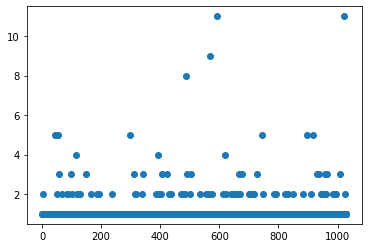

In [286]:
#Построим точечный график количества заказов по пользователям. 
ordersByUsers = (orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}))
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Выводы и предположения. 

Мы наблюдаем, что у нас много пользователей с 3–5 заказами и есть пользователи с 11 заказами.

In [287]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
display(np.percentile(ordersByUsers['orders'], [90, 95, 99]))


array([1., 2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа и 10% пользователей заказывали более одного раза.
Стоит отсеять пользователей, заказывающих более 2-х заказов.

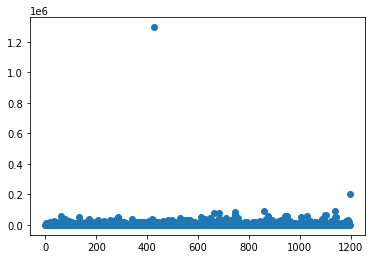

In [288]:
#Построим точечный график стоимостей заказов.
x_values=pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])


Выводы и предположения.

Мы видим, что имеется два крупных заказа...

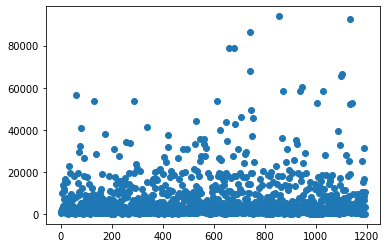

In [289]:
#Построим точечный график стоимостей заказов без учета дорогих заказов.
x_values=pd.Series(range(0, len(orders1['revenue'])))
plt.scatter(x_values, orders1['revenue'])


Видно, что присутствует хвост из заказов свыше 30000-40000. Основная масса заказов где-то до 20000. В этой зоне точечный график гораздо плотнее...

In [290]:
#Посчитаум 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
display(np.percentile(orders['revenue'], [90, 95, 99]))

array([18168. , 28000. , 58233.2])

Только 5% пользователей делают заказы дороже 30000, и 1% пользователей делает заказы дороже 60000. Стоит отсеять пользователей, делающих заказы дороже 30000.

In [291]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [292]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])), name='orders')], axis=0)

#применим статистический критерий Манна-Уитни к полученным выборкам
display("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
display("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

'0.017'

'0.138'

Выводы и предположения:
Нулевая гипотеза — различий в среднем количестве заказов между группами по «сырым» данным нет.

Альтернативная гипотеза — различия в среднем количестве заказов между группами по «сырым» данным есть.

По результатам теста мы можем отвергнуть нулевую гипотезу и сказать, что по «сырым» данным есть различия в среднем количестве заказов групп А и В. У группы А почти на 14% заказов меньше.


In [293]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

#применим статистический критерий Манна-Уитни к полученным выборкам
display("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
display("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

'0.729'

'0.259'

Выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами по «сырым» данным нет.

Альтернативная гипотеза: различия в среднем чеке между группами по «сырым» данным есть.

По результатам теста нет причин отвергнуть нулевую гипотезу. Различий в среднем чеке по «сырым» данным между группами нет. Но средний чек группы А значительно ниже среднего чека группы В (почти на 26%).

In [294]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

68

Получилось всего 68 аномальных пользователей.

In [295]:
#подготовим выборки количества заказов по отфильтрованным данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()-len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()-len(ordersByUsersB['orders'])), name='orders')], axis=0)

#применим статистический критерий Манна-Уитни к полученным выборкам
display("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'0.013'

'0.172'

Выводы и предположения.

Нулевая гипотеза — различий в среднем количестве заказов между группами по отфильтрованным данным нет.

Альтернативная гипотеза — различия в среднем количестве заказов между группами по отфильтрованным данным есть.

По результатам теста мы можем отвергнуть нулевую гипотезу и сказать, что по отфильтрованным данным различия в среднем количестве заказов групп А и В сохранились и даже стали больше. У группы А на 17% заказов меньше.


In [296]:
#Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

#применим статистический критерий Манна-Уитни к полученным выборкам
display("{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
display("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

'0.720'

'-0.023'

Выводы и предположения.

Нулевая гипотеза — различий в среднем чеке между группами по отфильтрованным данным нет.

Альтернативная гипотеза — различия в среднем чеке между группами по отфильтрованным данным есть.

По результатам теста нет причин отвергнуть нулевую гипотезу. Различий в среднем чеке между группами нет и по отфильтрованным данным. По отфильтрованным данным картина изменилась — средний чек группы А стал примерно таким же, как и средний чек группы В.

### Дополнительные расчеты
Для понимания, стоит ли останавливать тест или необходимо его продолжить, мне требуется посмотреть на графики по очищенным данным (без заказов дороже 30000, без пользователей, сделавших больше 2-х заказов, и с выровненными датами). 

In [310]:
#Удалим пользователей совершивших более 2 заказов.
usersNotNormOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)
display(usersNotNormOrders.unique())
usersNotNormOrders1 = [199603092, 237748145, 611059232, 1230306981, 1614305549, 2038680547, 2108163459, 2378935119, 2458001652, 2988190573, 3908431265, 3967698036, 4256040402, 249864742, 457167155, 2587333274, 2742574263, 3062433592, 3717692402, 3803269165]
orders8 = orders.query("visitorId != @usersNotNormOrders1")
orders9 = orders.query("visitorId == @usersNotNormOrders1")

display(orders)
display(orders8)
display(orders9.groupby('visitorId').count())
orders3

array([ 199603092,  237748145,  611059232, 1230306981, 1614305549,
       2038680547, 2108163459, 2378935119, 2458001652, 2988190573,
       3908431265, 3967698036, 4256040402,  249864742,  457167155,
       2587333274, 2742574263, 3062433592, 3717692402, 3803269165])

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


,transactionId,date,revenue,group
visitorId,,,,
199603092,5,5,5,5
237748145,5,5,5,5
249864742,3,3,3,3
457167155,4,4,4,4
611059232,3,3,3,3
1230306981,5,5,5,5
1614305549,4,4,4,4
2038680547,8,8,8,8
2108163459,3,3,3,3


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [298]:
#мы сместили даты и выравнели их в файлах orders и visitors
visit_sm = visitors
display(visitors['date'].head(11))
visit_sm['date'] = pd.to_datetime(visit_sm['date'])
visit_sm['date'] = visit_sm['date'] + timedelta(days=1)
visit_sm['date'] = visit_sm['date'].map(lambda x:dt.datetime.strftime(x, '%Y-%m-%d'))
display(visit_sm['date'].head(11))
visitors['date'].head(11)

0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
5     2019-08-06
6     2019-08-07
7     2019-08-08
8     2019-08-09
9     2019-08-10
10    2019-08-11
Name: date, dtype: object

0     2019-08-02
1     2019-08-03
2     2019-08-04
3     2019-08-05
4     2019-08-06
5     2019-08-07
6     2019-08-08
7     2019-08-09
8     2019-08-10
9     2019-08-11
10    2019-08-12
Name: date, dtype: object

0     2019-08-02
1     2019-08-03
2     2019-08-04
3     2019-08-05
4     2019-08-06
5     2019-08-07
6     2019-08-08
7     2019-08-09
8     2019-08-10
9     2019-08-11
10    2019-08-12
Name: date, dtype: object

Text(0, 0.5, 'к-во покупок')

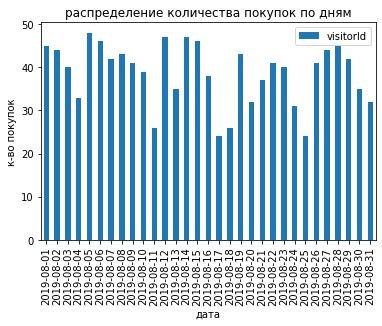

In [299]:
#display(orders.pivot_table(index='date', values='visitorId', aggfunc='count'))
orders.pivot_table(index='date', values='visitorId', aggfunc='count').plot.bar(); 
plt.title('распределение количества покупок по дням')
plt.xlabel('дата')
plt.ylabel('к-во покупок')

Text(0, 0.5, 'к-во пользователей')

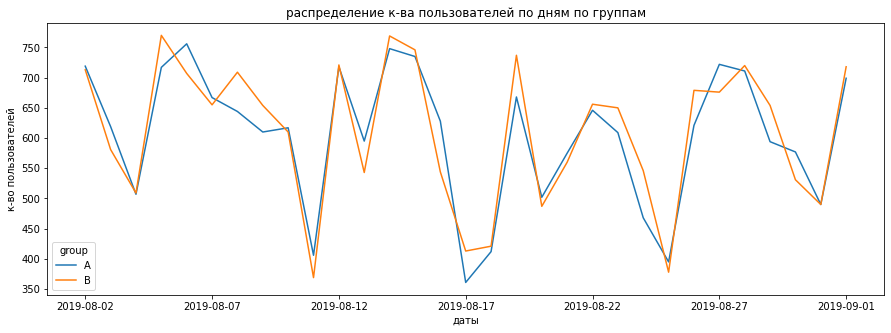

In [300]:
raspr_day_group = visitors.pivot_table(index='date', columns='group', values='visitors', aggfunc='mean')
raspr_day_group.plot(figsize=(15,5)); 
plt.title('распределение к-ва пользователей по дням по группам')
plt.xlabel('даты')
plt.ylabel('к-во пользователей')
#raspr_day_group

Теперь даты на обоих графиках совпадают. В те дни, когда совершено меньше всего покупок и выручка за день меньше всего (11.08, 17–18.08, 25.08), совпадают с днями, когда интернет-магазин посетило меньше всего пользователей (11.08, 17–18.08, 25.08).

Text(0.5, 0, 'Даты')

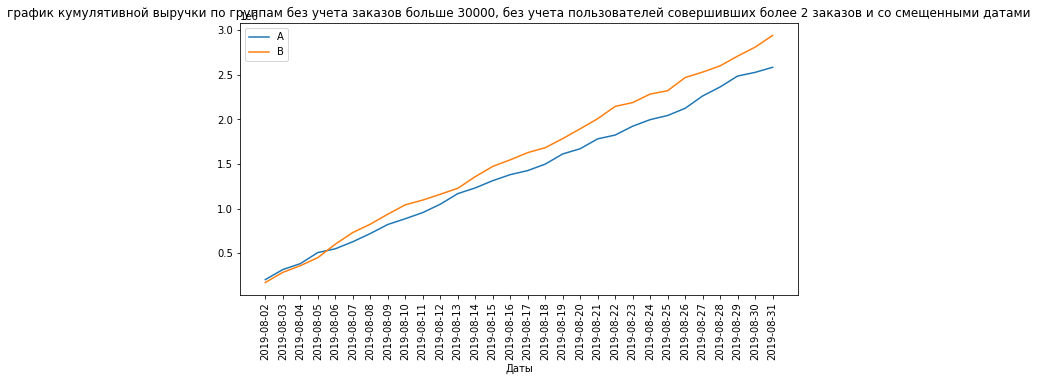

In [301]:
#Построим график кумулятивной выручки по группам без учета заказов больше 30000, без учета пользователей совершивших более 2 заказов и со смещенными датами

orders2 = orders8[orders8['revenue'] <= 30000]
#orders2 = orders3[orders3['revenue'] <= 30000]

#создадим массив уникальных пар значений дат и групп теста

datesGroup2 = orders2[['date', 'group']].drop_duplicates()

#соберем агрегированные кумулятивные по дням данные о заказах
ordersAggregated2 = datesGroup2.apply(lambda x: orders2[np.logical_and(orders2['date'] <= x['date'], orders2['group'] == x['group'])]\
                                   .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis=1)\
                                   .sort_values(by=['date', 'group'])

#получим агрегированные купулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated2 = datesGroup2.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                   .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                   .sort_values(by=['date', 'group'])

#Объединяем обе таблицы в одну с понятным названием столбцов
cumulativeData2 = ordersAggregated2.merge(visitorsAggregated2, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData2.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#Построим график кумулятивной выручки по дням и группам
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA2 = cumulativeData2[cumulativeData2['group'] == 'A'][['date', 'revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В
cumulativeRevenueB2 = cumulativeData2[cumulativeData2['group'] == 'B'][['date', 'revenue', 'orders']]

#строим график выручки группы А
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA2['date'], cumulativeRevenueA2['revenue'], label='A')

#строим график выручки группы B
plt.plot(cumulativeRevenueB2['date'], cumulativeRevenueB2['revenue'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('график кумулятивной выручки по группам без учета заказов больше 30000, без учета пользователей совершивших более 2 заказов и со смещенными датами')
plt.xlabel('Даты')


График кумулятивной выручки стал более стабилен, и различия между группами стали более выраженные. Кумулятивная выручка в группе В превосходит выручку группы А уже с самого начала теста (5–6 августа). И с течением теста разрыв увеличивается.

Text(0.5, 0, 'даты')

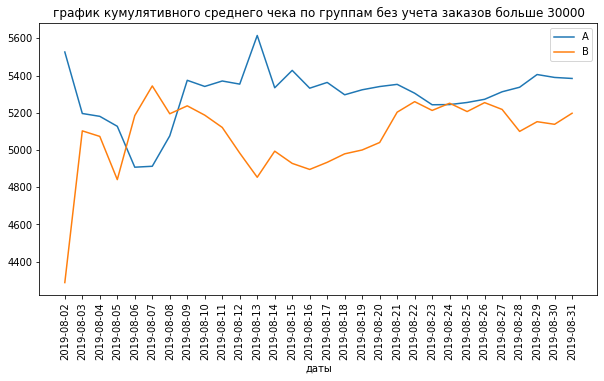

In [302]:
#Построим график кумулятивного среднего чека по группам без учета заказов больше 30000. 
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA2['date'], cumulativeRevenueA2['revenue']/cumulativeRevenueA2['orders'], label = 'A')
plt.plot(cumulativeRevenueB2['date'], cumulativeRevenueB2['revenue']/cumulativeRevenueB2['orders'], label = 'B')
plt.legend()
plt.xticks(rotation=90)
plt.title('график кумулятивного среднего чека по группам без учета заказов больше 30000')
plt.xlabel('даты')



График кумулятивного среднего чека тоже изменился — стали более выражены убывающие волны. Средний чек на протяжении всего теста то увеличивался в одной группе и уменьшался в другой, то наоборот. Постепенно эти волны затухают и, скорее всего, придут к стабильному среднему чеку для каждой группы. Средний чек в группе А выше среднего чека в группе В.

Text(0.5, 0, 'даты')

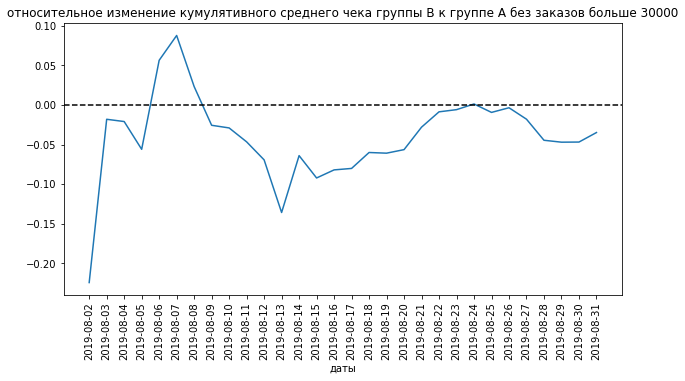

In [303]:
#Построим график относительного изменения кумулятивного среднего чека группы B к группе A без заказов больше 30000, без пользователей больше 2 заказов и со смещенными датами. 

#соберем данные в одном датафрейме
mergedCumulativeRevenue2 = cumulativeRevenueA2.merge(cumulativeRevenueB2, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим отношения средних чеков
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue2['date'],(mergedCumulativeRevenue2['revenueB']/mergedCumulativeRevenue2['ordersB'])/(mergedCumulativeRevenue2['revenueA']/mergedCumulativeRevenue2['ordersA'])-1)

#добавляем ось Х
plt.axhline(y=0, color='black', linestyle='--')
plt.title('относительное изменение кумулятивного среднего чека группы B к группе A без заказов больше 30000')
plt.xticks(rotation=90)
plt.xlabel('даты')

На графике изменения кумулятивного среднего чека группы B к группе A эти затухающие волны отчётливо видны. 

(0.0, 29.0, 0.0, 0.08)

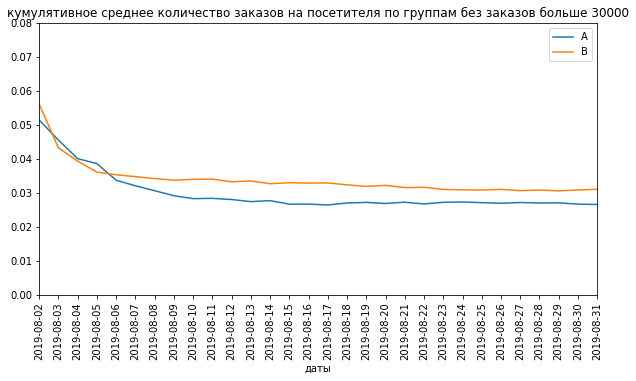

In [304]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам без заказов больше 30000. 

#считаем среднее количество заказов на посетителя
cumulativeData2['conversion'] = cumulativeData2['orders']/cumulativeData2['visitors']

#отделяем данные по группе А
cumulativeDataA2 = cumulativeData2[cumulativeData2['group'] == 'A']

#отделяем данные по группе B
cumulativeDataB2 = cumulativeData2[cumulativeData2['group'] == 'B']

#строим график
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA2['date'], cumulativeDataA2['conversion'], label='A')
plt.plot(cumulativeDataB2['date'], cumulativeDataB2['conversion'], label='B')


plt.legend()
plt.title('кумулятивное среднее количество заказов на посетителя по группам без заказов больше 30000')
plt.xticks(rotation=90)
plt.xlabel('даты')
plt.axis(['2019-08-02', '2019-08-31', 0, 0.080])

На графике кумулятивного среднего количества заказов на посетителя по группам отчетливо видно, что в группе В среднее количество заказов за каждый день стабильно превосходит количество заказов в группе А почти с самого начала теста ... (с 6 августа).

Text(0.5, 0, 'даты')

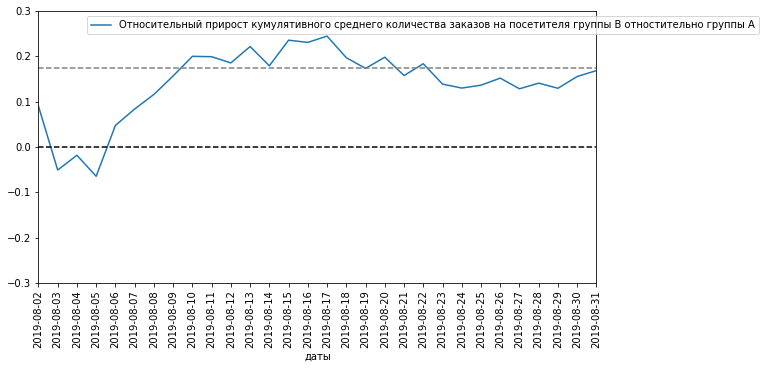

In [317]:
#Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A (без учета двух дорогих заказов). 
mergedCumulativeConversion2 = cumulativeDataA2[['date', 'conversion']].merge(cumulativeDataB2[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversion2['date'], mergedCumulativeConversion2['conversionB']/mergedCumulativeConversion2['conversionA']-1, label ='Относительный прирост кумулятивного среднего количества заказов на посетителя группы В отностительно группы А')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.axhline(y=0.175, color='grey', linestyle = '--')
plt.axis(['2019-08-02', '2019-08-31', -0.3, 0.3])
plt.xticks(rotation=90)
plt.xlabel('даты')

На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A очень хорошо видно, что среднее количество заказов в группе В стабильно превышает таковой в группе А.

In [306]:
#смотрим в целом по группам после исключения заказов больше 30000 и пользователей совершивших более 2 заказов
display('Количество покупок в группе А:', orders2[orders2['group'] == 'A']['revenue'].count())
display('Количество покупок в группе В:', orders2[orders2['group'] == 'B']['revenue'].count())

display('Общая сумма выручки в группе А:', orders2[orders2['group'] == 'A']['revenue'].sum())
display('Общая сумма выручки в группе В:', orders2[orders2['group'] == 'B']['revenue'].sum())

display('Средняя стоимость одной покупки в группе А:', orders2[orders2['group'] == 'A']['revenue'].mean())
display('Средняя стоимость одной покупки в группе В:', orders2[orders2['group'] == 'B']['revenue'].mean())

display('Медианная стоимость одной покупки в группе А:', orders2[orders2['group'] == 'A']['revenue'].median())
display('Медианная стоимость одной покупки в группе В:', orders2[orders2['group'] == 'B']['revenue'].median())

'Количество покупок в группе А:'

480

'Количество покупок в группе В:'

566

'Общая сумма выручки в группе А:'

2584375

'Общая сумма выручки в группе В:'

2941641

'Средняя стоимость одной покупки в группе А:'

5384.114583333333

'Средняя стоимость одной покупки в группе В:'

5197.245583038869

'Медианная стоимость одной покупки в группе А:'

2900.0

'Медианная стоимость одной покупки в группе В:'

2682.0

Из данных видно, что в целом за месяц в группе В на 18% больше покупок, чем в группе А (480 и 566 соответственно). Общая выручка за месяц почти на 14% больше в группе В, чем в группе А (на 360000 больше) за счет большего количества заказов. И это всё на фоне незначительно большего среднего и медианого чека в группе А (5380 и 5200 (больше на 3,5%), 2900 и 2790 — соответственно).

### Выводы:
По результатам анализа А/В-теста стоит остановить тест и зафиксировать победу группы В.

Имеющиеся факты:

 1. По среднему количеству заказов группа В статистически значимо превосходит группу А на 17% как по «сырым» данным, так и по данным после фильтрации аномалий.

 2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

 3. График различия среднего количества заказов между группами сообщает, что результаты группы В значительно лучше группы А.

 4. График различия среднего чека между группами говорит о том, что результаты группы В ниже среднего чека группы А. На момент окончания теста средние чеки не стал стабильны, но чек группы B приблизился к среднему чеку группы А.

 5. График кумулятивной выручки сообщает, что кумулятивная выручка в группе В превосходит выручку группы А уже с самого начала теста (5–6 августа). И с течением теста разрыв увеличивается.

 6. В целом за месяц в группе В на 18% больше покупок, чем в группе А (480 и 566 соответственно). Общая выручка за месяц почти на 13% больше в группе В, чем в группе А (на 360 000 больше) за счет большего количества заказов. И это всё на фоне немного большнго среднего и медианного чеков группы А (5380 и 5200, 2900 и 2790 — соответственно).

В группе В пользователи совершают больше заказов на фоне незначительно большего среднего чека в группе А. В целом это приводит к большей месячной выручки (почти на 18%) в группе В, чем в группе А.